In [1]:
import SMEFT19

In [4]:
import numpy as np

In [3]:
import flavio
flavio.__version__ #we're using the old version, flavio 1.5

'2.3.1'

### Scenario I
Fit only to `C`, `beta_l` and `beta_q`

In [4]:
def fit(x):
    return -SMEFT19.likelihood_global(x, SMEFT19.scenarios.rotBI)

In [5]:
bf, v, d, L = SMEFT19.ellipse.minimum(fit, [-0.117, 0, 0.751])

Minimizing...
Pull: 5.732129288814944 sigma


In [6]:
bf

array([-1.25709823e-01, -5.36322759e-14,  1.05354660e+00])

In [7]:
-2*L

40.14691638642315

In [8]:
SMEFT19.ellipse.save(bf, v, d, L, 'ellipse_scI.yaml', name='Includes 2021 Moriond data', fit='rotBI')

In [9]:
dchi = flavio.statistics.functions.delta_chi2(1,3)
dchi

3.5267403802617303

In [10]:
d_ell = SMEFT19.ellipse.load('ellipse_scI.yaml')
v = d_ell['v']
d = d_ell['d']
H = v @ d @ v.T
bf = d_ell['bf']
L = d_ell['L']

In [13]:
fit(np.array(bf) - np.array([0.05,0,0]))-L #Error for C = 0.05

3.735004126193097

In [16]:
fit(np.array(bf) - np.array([0,0.019,0]))-L #Error for bl = 0.019

3.6428097330123137

In [17]:
fit(np.array(bf) + np.array([0,0,1.7]))-L #Error for bq = +1.7 (asym)

3.4637593513608493

In [19]:
fit(np.array(bf) - np.array([0,0,0.73]))-L #Error for bq = -0.72 (asym)

3.481865400721574

### Scenario II
Fit to all parameters

In [9]:
def fit(x):
    return -SMEFT19.likelihood_global(x, SMEFT19.scenarios.rotBII)

In [10]:
bf2, v, d, L = SMEFT19.ellipse.minimum(fit, [-0.12, 0.07, 0, -0.076, 0.803])

Minimizing...
Pull: 7.071672324032612 sigma


In [11]:
bf2

array([-1.25752918e-01,  7.55406063e-02,  4.05430015e-05, -5.57208373e-02,
        7.49043756e-01])

In [12]:
-2*L

64.34714570679681

In [13]:
SMEFT19.ellipse.save(bf2, v, d, L, 'ellipse_scII_a.yaml', name='Includes 2021 Moriond data', fit='rotBII')

In [25]:
dchi = flavio.statistics.functions.delta_chi2(1,5)
dchi

5.887595445915204

In [26]:
d_ell = SMEFT19.ellipse.load('ellipse_scII_a.yaml')
v = d_ell['v']
d = d_ell['d']
H = v @ d @ v.T
bf = d_ell['bf']
L = d_ell['L']

In [27]:
fit(np.array(bf2) - np.array([0.05,0,0,0,0]))-L #Error for C = 0.05

6.152515118775341

In [29]:
fit(np.array(bf2) + np.array([0,0.024,0,0,0]))-L #Error for al = 0.024

5.725242212942433

In [32]:
fit(np.array(bf2) + np.array([0,0,0.019,0,0]))-L #Error for bl = 0.019

5.999778759098582

In [34]:
fit(np.array(bf2) + np.array([0,0,0,0.11,0]))-L #Error for aq = +0.11 (asym)

3.8937656367619624

In [35]:
fit(np.array(bf2) - np.array([0,0,0,0.048,0]))-L #Error for aq = -0.048 (asym)

4.726994849180031

In [37]:
fit(np.array(bf2) + np.array([0,0,0,0,1.3]))-L #Error for bq = +1.4 (asymm)

5.5334446926287555

In [38]:
fit(np.array(bf2) - np.array([0,0,0,0,0.47]))-L #Error for bq = -0.47 (asym)

5.069909766040642

In [4]:
flavio.statistics.functions.pull((64.34714570679681-40.14691638642315)/2,2)

3.0410270049386643

Let's find another **local minimum**

In [113]:
bf2b, v, d, L = SMEFT19.ellipse.minimum(fit, [-0.124, 0.0736, 0, 0.0175, 0.667])

Minimizing...
Pull: 7.086556580520946 sigma


In [114]:
bf2b

array([-1.29226796e-01,  7.24475177e-02, -8.01886984e-06, -1.53468401e-03,
        7.48352343e-01])

In [121]:
d_ell = SMEFT19.ellipse.load('ellipse_scII_a.yaml')
v1 = d_ell['v']
d1 = d_ell['d']
bf1 = d_ell['bf']
L1 = d_ell['L']

In [122]:
def fit2(x):
    return -SMEFT19.likelihood_global([bf1[0], bf1[1], bf1[2], x[0], x[1]], SMEFT19.scenarios.rotBII)

In [123]:
bf2, v2, d2, L2 = SMEFT19.ellipse.minimum(fit2, [0.0175, 0.667])

Minimizing...
Pull: 7.667474971186631 sigma


In [117]:

bf

array([-1.29226796e-01,  7.24475177e-02, -8.01886984e-06, -1.53468401e-03,
        7.48352343e-01])

In [118]:
bf2

array([-0.00152962,  0.74830873])

In [2]:
SMEFT19.comparepulls.compare(SMEFT19.scenarios.rotBII, '../../ellipses/rotBII.yaml', '../../TeX/pullsBII')

In [4]:
gl = SMEFT19.SMEFTglob.gl.parameter_point({}, scale=1000)

In [5]:
obstable = gl.obstable()

In [30]:
obstable.index('a_mu')

TypeError: 'Index' object is not callable

In [42]:
o = tuple(obstable.index[1])
print(obstable.loc[[o], 'pull exp.'])

(<dBR/dq2>(Bs->phimumu), 2.5, 4.0)    3.99852
Name: pull exp., dtype: object


In [3]:
import SMEFT19.plots

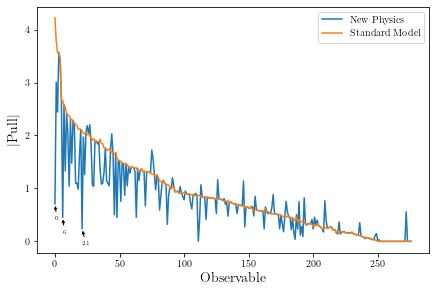

In [4]:
SMEFT19.plots.compare_plot(SMEFT19.scenarios.rotBII, 'ellipse_scII_a.yaml', 'pulls_scII', 1.5)

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
minpars = [-0.4, -0.15, -0.02, -0.2, 0]
maxpars = [0, 0.15, 0.02, 0.1, 2]
labels = [r'$C$', r'$\alpha^\ell$', r'$\beta^\ell$', r'$\alpha^q$', r'$\beta^q$' ]
names = ['C', 'al', 'bl', 'aq', 'bq']

In [20]:
d_ell = SMEFT19.ellipse.load('ellipse_scII_a.yaml')
bf = d_ell['bf']

In [21]:
def evoplot(i):
    logL = []
    for p in np.linspace(minpars[i], maxpars[i], 200):
        newpoint = bf.copy()
        newpoint[i] = p
        logL.append(SMEFT19.likelihood_fits(newpoint, SMEFT19.scenarios.rotBII))
    return logL

In [22]:
from multiprocessing import Pool

In [25]:
with Pool(3) as pool:
    evos = pool.map(evoplot, range(5))

In [26]:
df_evo = [0]*5

In [27]:
for i in range(5):
    df_evo[i] = pd.DataFrame(evos[i])

In [28]:
df_evo[0].describe()

,fast_likelihood_quarks.yaml,fast_likelihood_leptons.yaml,likelihood_ewpt.yaml,likelihood_lept.yaml,likelihood_rd_rds.yaml,likelihood_lfu_fccc.yaml,likelihood_lfu_fcnc.yaml,likelihood_bcpv.yaml,likelihood_bqnunu.yaml,likelihood_lfv.yaml,likelihood_zlfv.yaml,custom_custom,global
count,200.000000,200.000000,200.000000,2.000000e+02,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.0,200.000000
mean,-7.077309,-1.239546,-0.222396,-1.842911e-06,-15.080597,-0.071516,-2.165850,0.002860,0.412180,-3.331159,-0.000012,0.0,-28.773346
std,30.256069,0.778096,0.149122,1.072064e-06,27.327484,0.048545,14.606079,0.002608,0.227224,4.419985,0.000011,0.0,76.674222
min,-107.500024,-2.671099,-0.510132,-3.685966e-06,-86.792154,-0.167049,-38.564251,0.000000,-0.161155,-16.353180,-0.000036,0.0,-252.710369
25%,-12.063197,-1.894743,-0.345672,-2.764394e-06,-31.192780,-0.111135,-11.374836,0.000522,0.236955,-5.244651,-0.000020,0.0,-61.687594
50%,6.233481,-1.190820,-0.205814,-1.842875e-06,-0.739839,-0.065430,3.750870,0.002081,0.469367,-1.069974,-0.000009,0.0,8.646811
75%,12.354424,-0.559262,-0.090582,-9.214107e-07,6.213465,-0.028755,9.703149,0.004813,0.619326,-0.077775,-0.000002,0.0,26.232778
max,14.692647,0.000000,0.000000,0.000000e+00,8.443606,0.000000,11.763636,0.008714,0.671101,0.000000,0.000000,0.0,32.171717


In [29]:
fitcodes = {'RK':'likelihood_lfu_fcnc.yaml', 'RD':'likelihood_rd_rds.yaml',  'LFV':'likelihood_lfv.yaml', 'global':'global'}
fitlabels = {'RK':r'$R_{K^{(*)}}$', 'RD':r'$R_{D^{(*)}}$',  'LFV':'LFV', 'global':'Global'}

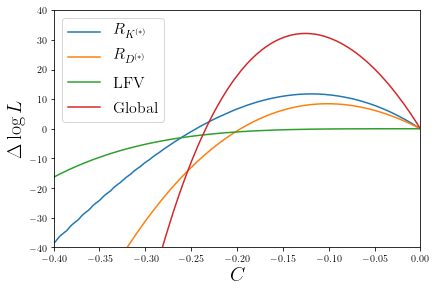

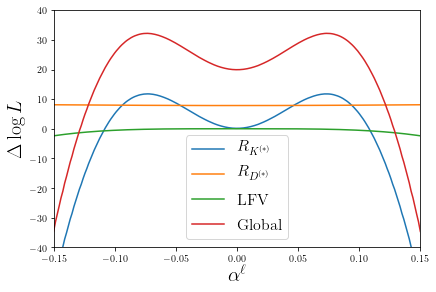

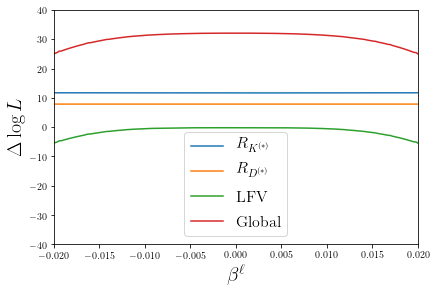

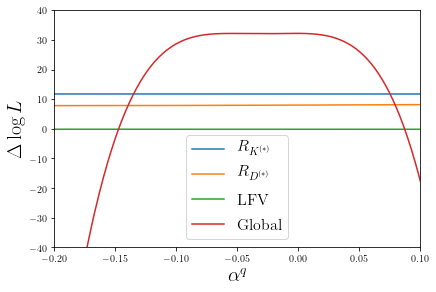

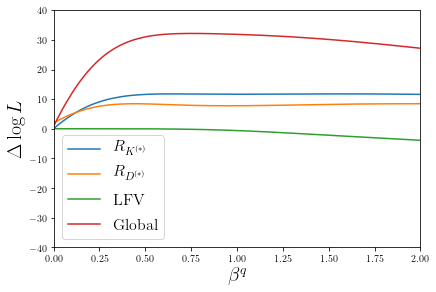

In [30]:
for i in range(5):
    fig = plt.figure()
    for p in fitcodes.keys():
        plt.plot(np.linspace(minpars[i], maxpars[i], 200), df_evo[i][fitcodes[p]], lw=1.5, label=fitlabels[p] )
    plt.ylim([-40,40])
    plt.xlim([minpars[i], maxpars[i]])
    plt.legend(fontsize=16)
    plt.xlabel(labels[i], fontsize=20)
    plt.ylabel(r'$\Delta \log L$', fontsize=20)
    plt.tight_layout(pad=0.5)
    fig.savefig('evoplot_' + names[i] + '.pdf')
    #fig.savefig('evoplot_' + names[i] + '.pgf')

In [24]:
plt.rcParams.update({'text.usetex':True})